# Linear regression

Import all the modules we need in this notebook

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import sklearn 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn import model_selection

First, we load the data, using the name `fram` for the DataFrame variable. We make sure that in the data we loaded the column and row headers are in place. Then, we check summary of the variables using the `describe` method.

In [197]:
fram = pd.read_table('fram.txt', sep='\t')
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Now, let us create a function `rescale` that takes a Series as parameter. The function center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation, the it returns the rescaled Series.

In [177]:
def rescale(s):
    #create function to center data
    center_function = lambda x: x - x.mean()
    #apply function to original NumPy array
    data_centered_norm = center_function(s)/(2*s.std())
    return data_centered_norm

Now, we can add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). To do that, let's add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [178]:
fram['sAGE'] = rescale(fram['AGE'])
fram['sFRW'] = rescale(fram['FRW'])
fram['sSBP'] = rescale(fram['SBP'])
fram['sDBP'] = rescale(fram['DBP'])
fram['sCHOL'] = rescale(fram['CHOL'])
fram['sCIG'] = rescale(fram['CIG'])
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH,sAGE,sFRW,sSBP,sDBP,sCHOL,sCIG
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512,1.376231e-16,1.223316e-16,-1.172345e-16,-1.529145e-16,-1.172345e-16,2.038860e-17
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000,-7.770703e-01,-1.503033e+00,-1.036435e+00,-1.410618e+00,-1.497122e+00,-3.465693e-01
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000,-4.633616e-01,-3.200998e-01,-3.227115e-01,-3.562285e-01,-3.741042e-01,-3.465693e-01
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000,-4.508343e-02,-6.661422e-02,-1.085945e-01,-4.765177e-03,-5.015684e-02,-3.465693e-01
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000,3.731948e-01,2.432015e-01,2.125810e-01,2.764055e-01,3.169835e-01,5.166802e-01
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000,1.000612e+00,3.285029e+00,2.710613e+00,2.455478e+00,2.109492e+00,2.243179e+00


#The analysis starts:

Let's form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. The model is stored in variable named `fit`. We can inspect the estimates of the coefficients using the `summary` method.

In [179]:
fit = smf.ols('SBP ~ sFRW + SEX +sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           4.13e-40
Time:                        20:39:18   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Let's add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again let's use the name `fit` for the fitted model. (From now on we are going to use the name `fit` for the variable of the fitted model.)

In [180]:
fit = smf.ols('SBP ~ sFRW + SEX +sCHOL+sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.44e-46
Time:                        20:39:18   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

Now let's compare these two models and answer for instance this question: How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

1. To answer the question how much does the inclusion of age increase the explanatory power of the model, we compare the coefficients of determination (R_squared) of these models (calculate the difference): 0.146 - 0.125 = 0.021. This means that the inclusion of age increase the explanatory power of the model by 2%.

2. To answer the question which variable explain the variance of the target variable most, we have to inspect the coefficients of each variable and the their p_values: The variable FRW explain the variance of the target variable most; one unite increase of FRW, incleases the target variable by 16.9771.

***



Now, let's add to the model all the interactions with other variables and see if the model will improve. 

In [181]:
#fit the model
fit=smf.ols(
    'SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL +'
    ' sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', 
    data=fram
).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           4.92e-43
Time:                        20:39:18   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Only very small improvement in the model, but some variables have very bad p_vales which indicates that they should be excluded from the model. Let us now visualize the model as the function of weight for the youngest (sAGE = -1.0), middle aged (sAGE = 0.0), and oldest (sAGE = 1.0) women while assuming the background variables to be centered. Consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

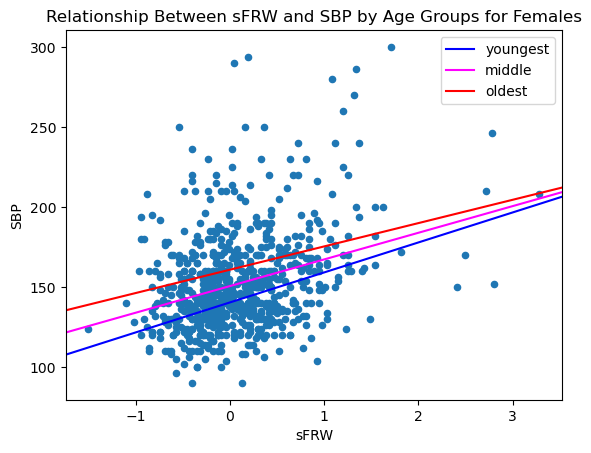

In [182]:
p = fit.params
fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP")

# Adding regression lines for different age groups
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"],
            ax=plt.gca(), color="blue", label="youngest")
abline_plot(intercept=p.Intercept, slope=p.sFRW,
            ax=plt.gca(), color="magenta", label="middle")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"],
            ax=plt.gca(), color="red", label="oldest")

# Adding title and legend
plt.title("Relationship Between sFRW and SBP by Age Groups for Females")
plt.legend()


How does the dependence of blood pressure on weight change as a person gets older?
***
As the person gets older, the more weight the person has, the more risk of having high blood pressure increases.
***

### Even more accurate model

Now, let us include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.99e-40
Time:                        20:39:18   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

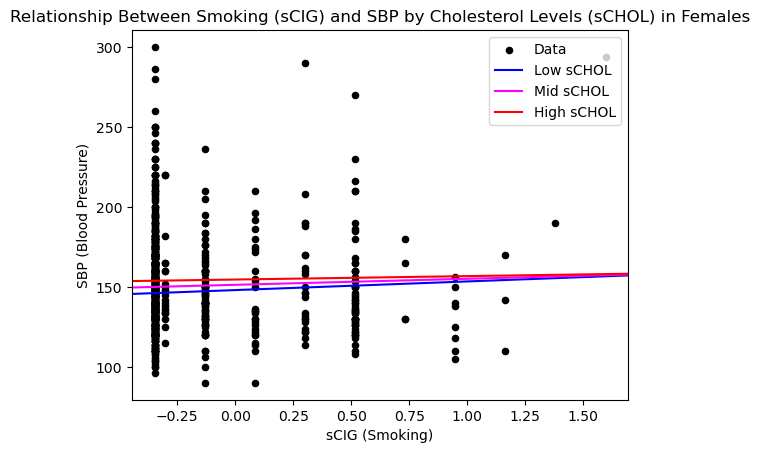

In [183]:
# Fit the model
fit = smf.ols(
    'SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + '
    'sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + '
    'sCHOL:sAGE + sFRW:sCIG + SEX:sCIG + sCHOL:sCIG + sAGE:sCIG',
    data=fram
).fit()

# Print the model summary
print(fit.summary())

# Visualization
p = fit.params  # Extract model parameters

# Scatter plot for females
fram[fram.SEX == "female"].plot.scatter("sCIG", "SBP", color="black", label="Data")

# Add regression lines for different levels of sCHOL
abline_plot(
    intercept=p.Intercept - p["sCHOL"], slope=p.sCIG - p["sCHOL:sCIG"],
    ax=plt.gca(), color="blue", label="Low sCHOL"
)
abline_plot(
    intercept=p.Intercept, slope=p.sCIG,
    ax=plt.gca(), color="magenta", label="Mid sCHOL"
)
abline_plot(
    intercept=p.Intercept + p["sCHOL"], slope=p.sCIG + p["sCHOL:sCIG"],
    ax=plt.gca(), color="red", label="High sCHOL"
)

# Add title and legend
plt.title("Relationship Between Smoking (sCIG) and SBP by Cholesterol Levels (sCHOL) in Females")
plt.legend()
plt.xlabel("sCIG (Smoking)")
plt.ylabel("SBP (Blood Pressure)")
plt.show()


How does the model and its accuracy look?

***

The model is not suitable for this data. We should consider using another model to model SBP using these variables. One may consider the logistic regression instead of linear regression. In the next steps for this project, we are going to use the logistic regression to model the SBP using the variables and the data given in this dataset.

***

# Logistic regression

We continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Let's consider `SBP >= 140` and `DBP >= 90`, create the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW`, and compute and store the error rate into variable `error_rate_orig`.


In [184]:
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype(int)
#fit the model
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,
family=sm.families.Binomial(statsmodels.genmod.families.links.Logit())).fit()

#calculate the error rate
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)

0.35581061692969873



Add the `sAGE` variable and its interactions and check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.


In [185]:
#fit the model
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW +sAGE:SEX", data=fram,
family=sm.families.Binomial(statsmodels.genmod.families.links.Logit())).fit()

#calculate the error rate
error_rate = np.mean(((fit.fittedvalues < 0.5) & (fram.HIGH_BP==1)) |((fit.fittedvalues > 0.5) & (fram.HIGH_BP==0)))
print(error_rate)

0.3278335724533716


Now, let us visualize the predicted probability of high blood pressure as the function of weight. 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Thu, 23 Jan 2025   Deviance:                       1691.0
Time:                        20:39:19   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07865
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

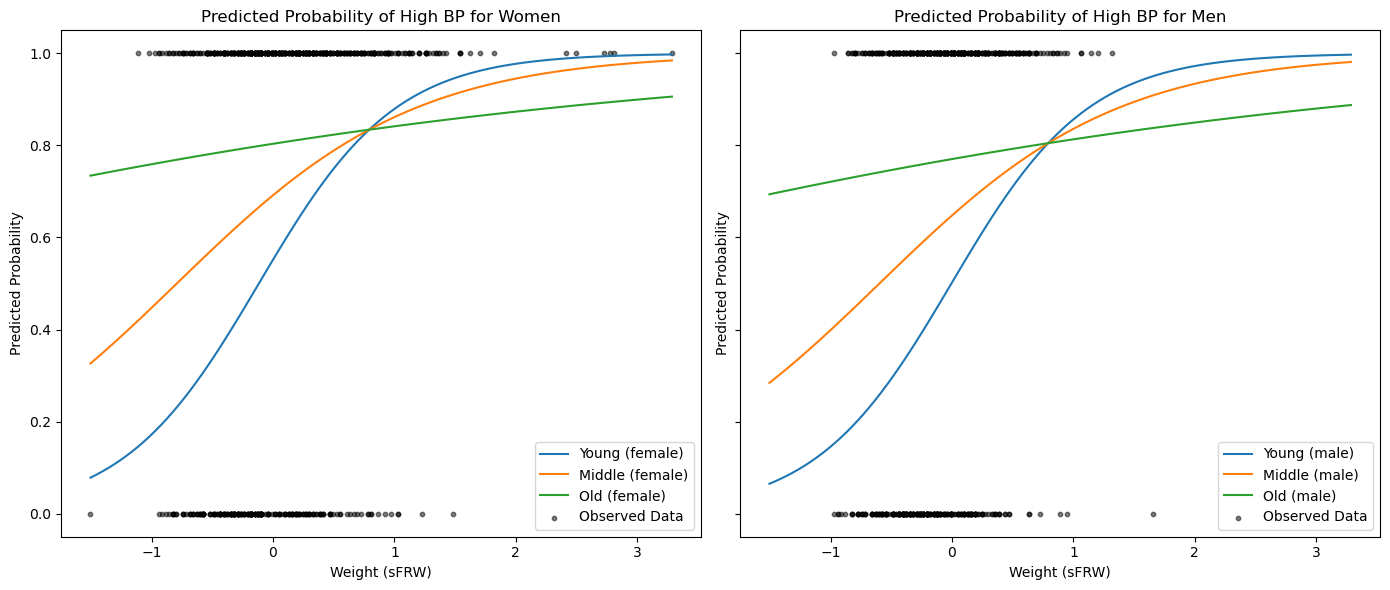

In [186]:
#Create the logistic function
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Fit the logistic regression model
fit = smf.glm(
    formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX",
    data=fram,
    family=sm.families.Binomial(sm.families.links.Logit())
).fit()
print(fit.summary())
# Extract model coefficients
params = fit.params

# Define age groups (standardized values)
age_groups = {"young": -1, "middle": 0, "old": 1}

# Define sex categories (numeric representation)
sex_categories = {"female": 0, "male": 1}

# Generate weight values for prediction
sFRW_values = np.linspace(fram["sFRW"].min(), fram["sFRW"].max(), 100)

# Set up a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].set_title("Predicted Probability of High BP for Women")
axes[1].set_title("Predicted Probability of High BP for Men")

# Iterate over sex and age groups to plot
for ax, (sex_label, sex_value) in zip(axes, sex_categories.items()):
    for age_label, age_value in age_groups.items():
        # Create a DataFrame with prediction inputs
        pred_data = pd.DataFrame({
            "sFRW": sFRW_values,
            "sAGE": age_value,
        })

        # Add interaction terms and account for categorical SEX variable
        if sex_label == "male":
            pred_data["SEX[T.male]"] = 1
            pred_data["SEX:sFRW"] = pred_data["SEX[T.male]"] * pred_data["sFRW"]
            pred_data["sAGE:SEX"] = pred_data["sAGE"] * pred_data["SEX[T.male]"]
        else:
            pred_data["SEX[T.male]"] = 0
            pred_data["SEX:sFRW"] = 0
            pred_data["sAGE:SEX"] = 0

        pred_data["sAGE:sFRW"] = pred_data["sAGE"] * pred_data["sFRW"]

        # Compute linear predictor (Xβ)
        linear_predictor = (
            params["Intercept"] +
            params["sFRW"] * pred_data["sFRW"] +
            params.get("SEX[T.male]", 0) * pred_data["SEX[T.male]"] +
            params.get("SEX:sFRW", 0) * pred_data["SEX:sFRW"] +
            params["sAGE"] * pred_data["sAGE"] +
            params["sAGE:sFRW"] * pred_data["sAGE:sFRW"] +
            params.get("sAGE:SEX", 0) * pred_data["sAGE:SEX"]
        )

        # Compute probabilities using the logistic function
        pred_probs = logistic(linear_predictor)

        # Plot the predicted probabilities
        ax.plot(
            sFRW_values, pred_probs,
            label=f"{age_label.capitalize()} ({sex_label})"
        )

    # Plot the observed data points
    observed_data = fram[fram["SEX"].map({"female": 0, "male": 1}) == sex_value]
    ax.scatter(
        observed_data["sFRW"],
        observed_data["HIGH_BP"],
        color="black", alpha=0.5, label="Observed Data", s=10
    )

    # Set axis labels
    ax.set_xlabel("Weight (sFRW)")
    ax.set_ylabel("Predicted Probability")
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


For both females and males, the probability of having high blood pressure increases when weight increases. Old individuals have a high risk of HBP even for low weight, while young individuals have a low risk. This pattern is reversed when weight increases more.

We can also check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [187]:
#create a helper function to randomly split the data into training data and testing data

def train_test_split(df,train_fraction=0.8):
    train = df.sample(frac = train_fraction,random_state=1)
    test = df.drop(train.index)
    return train, test

#create a function to perform cross_validation

def cross_validation(df, formula, train_fraction=0.8, folds=100):
    """
    Perform cross-validation for a logistic regression model.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - formula (str): The formula for the logistic regression model.
    - train_fraction (float): The fraction of data to use for training (default is 0.8).
    - folds (int): The number of cross-validation folds (default is 100).

    Returns:
    - float: The average prediction accuracy across all folds.
    """
    accuracies = []

    for _ in range(folds):
        # Split the data into training and testing sets
        train_df, test_df = train_test_split(df, train_fraction=train_fraction)

        # Fit the logistic regression model on the training data
        model = smf.glm(formula=formula, data=train_df,
                        family=sm.families.Binomial(sm.families.links.Logit())).fit()

        # Make predictions on the testing set
        test_predictions = model.predict(test_df)

        # Classify predictions (threshold = 0.5)
        predicted_classes = (test_predictions >= 0.5).astype(int)

        # Calculate accuracy
        actual_classes = test_df["HIGH_BP"]
        accuracy = np.mean(predicted_classes == actual_classes)
        accuracies.append(accuracy)

    # Return the average accuracy across folds
    return np.mean(accuracies)


# Example usage with your logistic regression formula
formula = "HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX"
average_accuracy = cross_validation(fram, formula, train_fraction=0.8, folds=100)

print(f"Average Prediction Accuracy (100-fold CV): {average_accuracy:.2%}")


Average Prediction Accuracy (100-fold CV): 64.87%


We can evaluate the computed accuracy against baseline

In [188]:
baseline_accuracy = max(fram["HIGH_BP"].mean(), 1 - fram["HIGH_BP"].mean())
print(f"Baseline Accuracy: {baseline_accuracy:.2%}")

Baseline Accuracy: 64.99%


Since model's accuracy is not better than the baseline, the model may not be performing well.
Our investigation can be extended by analysis the confusion matrix, the precision and recall, and the ROC-AUC score ( Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric that evaluate the model's ability to discriminate between classes).

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, let's compute the mean of this variable, which tells the number of positive cases.

In [189]:
k = []
for i in fram.CHD:
    if i > 0:
        k.append(1) 
    else:
        k.append(0)
fram['hasCHD'] = k
fram['hasCHD'] = fram['hasCHD'].astype('int')
print(fram['hasCHD'].mean())

0.22022955523672882


Next, form a logistic regression model for variable hasCHD by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable fit. Compute the prediction accuracy of the model, store it to variable error_rate.

In [190]:
# Fit the logistic regression model
fit = smf.glm(
    formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW ",
    data=fram,
    family=sm.families.Binomial(sm.families.links.Logit())
).fit()

# Predict probabilities
predicted_probs = fit.predict(fram)

# Convert probabilities to binary predictions (threshold = 0.5)
predicted_classes = (predicted_probs >= 0.5).astype(int)

# Compute the prediction accuracy
actual_classes = fram["hasCHD"]
error_rate = 1 - np.mean(predicted_classes == actual_classes)

# Print the results
print("Fitted Model Summary:")
print(fit.summary())
print(f"\nPrediction Error Rate: {error_rate:.2%}")


Fitted Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Thu, 23 Jan 2025   Deviance:                       1442.4
Time:                        20:39:21   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.0

## Visualize the model using the most important explanator on the x-axis.
From the summary of our model, smoking has the most effect on presenting signs of coronary heart disease. Below, we visualize its effect when other variables are fixed to their mean values. Let's visualize both the points (with plt.scatter) and the logistic curve (with plt.plot). 

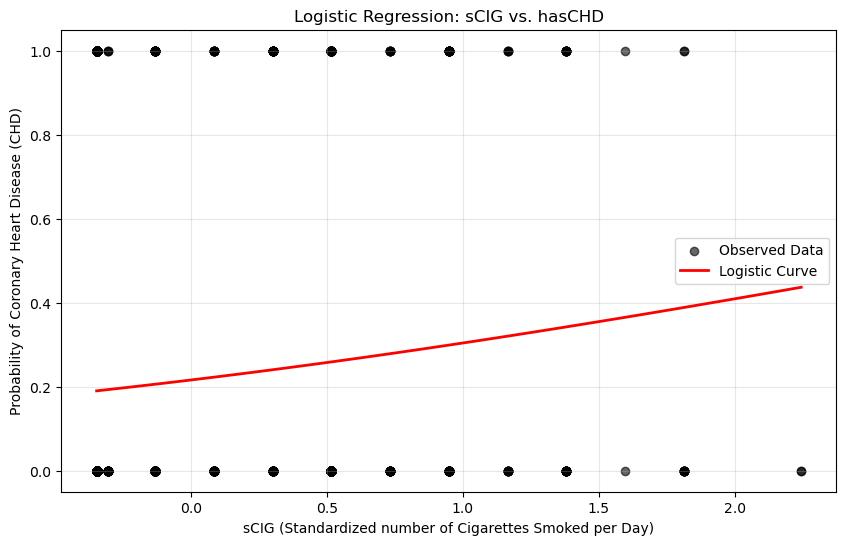

In [191]:
# Generate a range of values for sCIG
x_values = np.linspace(fram["sCIG"].min(), fram["sCIG"].max(), 100)

# Compute the linear predictor for sCIG while holding other variables constant
p = fit.params
linear_predictor = (
    p.Intercept +
    p.sCIG * x_values +
    p.sCHOL * fram["sCHOL"].mean() +  # Hold sCHOL constant
    p.sFRW * fram["sFRW"].mean() +   # Hold sFRW constant
    p["sCHOL:sCIG"] * (fram["sCHOL"].mean() * x_values) +
    p["sCHOL:sFRW"] * (fram["sCHOL"].mean() * fram["sFRW"].mean()) +
    p["sCIG:sFRW"] * (x_values * fram["sFRW"].mean())
)

# Apply the logistic function to compute probabilities
predicted_probs = logistic(linear_predictor)

# Plot the observed data points
plt.figure(figsize=(10, 6))
plt.scatter(fram["sCIG"], fram["hasCHD"], color="black", alpha=0.6, label="Observed Data")

# Plot the logistic curve
plt.plot(x_values, predicted_probs, color="red", linewidth=2, label="Logistic Curve")

# Add labels, title, and legend
plt.xlabel("sCIG (Standardized number of Cigarettes Smoked per Day)")
plt.ylabel("Probability of Coronary Heart Disease (CHD)")
plt.title("Logistic Regression: sCIG vs. hasCHD")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


At this stage, now we can take conclusions based on the model's accuracy. Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***

The model is good with accuracy of 0.78 and we can use it in practice to predict the probability of having a coronary heart desease.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal heart disease? Note that the model expects normalized values. We need to normalize first these values and store the normalized values to dictionary called `point`. The probability of showing signs of coronal heart disease is stored in variable `predicted`.

In [192]:
# Define the logistic function
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Normalized values
point = {
    "sCHOL": (200 - fram["sCHOL"].mean()) / fram["sCHOL"].std(),  # Normalize cholesterol
    "sCIG": (17 - fram["sCIG"].mean()) / fram["sCIG"].std(),      # Normalize cigarettes
    "sFRW": (100 - fram["sFRW"].mean()) / fram["sFRW"].std()      # Normalize weight
}

# Compute the linear predictor using the model coefficients
p = fit.params
linear_predictor = (
    p.Intercept +
    p.sCHOL * point["sCHOL"] +
    p.sCIG * point["sCIG"] +
    p.sFRW * point["sFRW"] +
    p["sCHOL:sCIG"] * (point["sCHOL"] * point["sCIG"]) +
    p["sCHOL:sFRW"] * (point["sCHOL"] * point["sFRW"]) +
    p["sCIG:sFRW"] * (point["sCIG"] * point["sFRW"])
)

# Compute the probability using the logistic function
predicted = logistic(linear_predictor)

# Print the results
print("Normalized Input Values:", point)
print(f"Predicted Probability of CHD: {predicted:.2%}")


Normalized Input Values: {'sCHOL': 400.0000000000003, 'sCIG': 33.999999999999915, 'sFRW': 200.0000000000004}
Predicted Probability of CHD: 100.00%
